# 시각 심화

- **Instructor**: Jongwoo Lim / Jiun Bae
- **Email**: [jlim@hanyang.ac.kr](mailto:jlim@hanyang.ac.kr) / [jiunbae.623@gmail.com](mailto:jiunbae.623@gmail.com)

## Machine Learnig Basic

In this example we will take a quick look at how machine learning works. The goals of this example are as follows:

- Understand **Machine Learning** and how they work.
- Learn basically how to **write and use code**.

And this example also is written in [IPython Notebook](https://ipython.org/notebook.html), an interactive computational environment, in which you can run code directly.

## Machine Learning Model

You can think of a basic machine learning model as a function that returns a predicted value for an input.

![](../assets/machine-learning-model.png)

To make this model return the results we want, we can use the training data to update the model with the differences from the desired results.

![](../assets/machine-learning-model-train.png)

## Perceptron: <small>Artifical Neuron</small>

An artificial neuron is a mathematical function based on a model of biological neurons, where each neuron takes inputs, weighs them separately, sums them up and passes this sum through a nonlinear function to produce output. A perceptron is a neural network unit (an artificial neuron) that does certain computations to detect features or business intelligence in the input data.

![](../assets/perceptron.png)

In [199]:
import numpy as np
import matplotlib.pyplot as plt

In [200]:
data_size = 1000
dimension = 2

### Random points

1000 dots within the range of $x: 0..1, y: 0..1$.

Points with $y>x$ will be green (label=0) and points with no blue (label=1).

In [201]:
points = np.random.rand(data_size, dimension)
labels = np.zeros(data_size)
labels[points[:, 0] > points[:, 1]] = 1

In [202]:
line = np.arange(0, 1, .001)

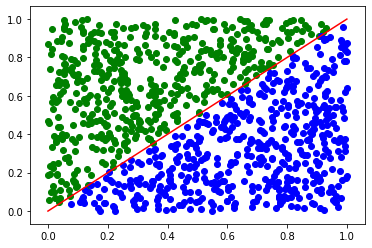

In [203]:
plt.scatter(points[labels == 0][:, 0], points[labels == 0][:, 1], c='g')
plt.scatter(points[labels == 1][:, 0], points[labels == 1][:, 1], c='b')
plt.plot(line, line, '-r')

### Simple perceptron

$w$ is weight, $b$ is bias

$y = wx + b$

In [214]:
weight = np.random.rand(dimension)
bias = np.random.rand(dimension)

In [215]:
def forward(weight, bias, X):
    return np.sum(np.multiply(X, weight) + bias)

In [216]:
prediction = forward(weight, bias, points[0])

In [217]:
print(f'We expected {labels[0]}, prediction is {0 if prediction > .5 else 1}')

We expected 0.0, prediction is 0


Calculate `error` and update `weight`, `bias`

In [218]:
error = prediction - labels[0]
weight = weight - .1 * error * points[0]
bias = bias - .1 * error

### Train & Test

In [219]:
train_size = int(data_size * .7)
train_points = points[:train_size]
train_labels = labels[:train_size]
test_points = points[train_size:]
test_labels = labels[train_size:]

Acc: 0.9400


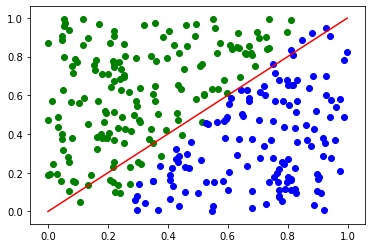

Acc: 0.9667


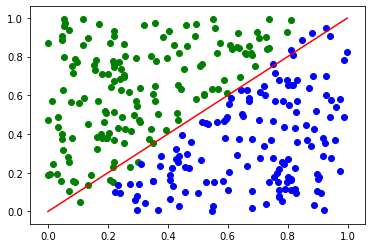

Acc: 0.9667


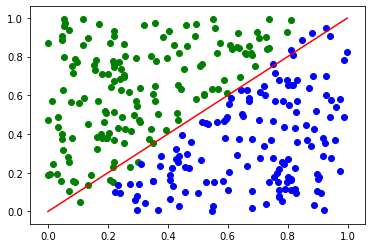

Acc: 0.9667


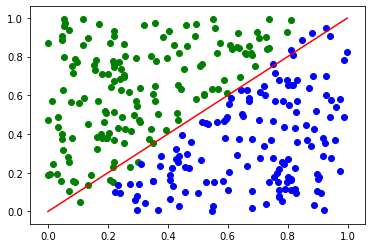

Acc: 0.9667


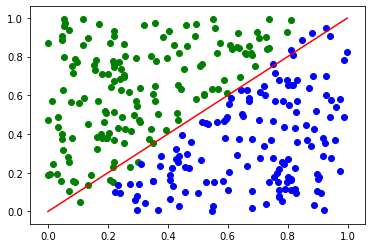

In [220]:
for epoch in range(500):
    # train
    for x, y in zip(train_points, train_labels):
        # get prediction
        pred = forward(weight, bias, x)
        # calculate error
        error = pred - y
        
        # update model
        weight -= .01 * error * x   
        bias -= .01 * error * x
    
    # test
    if not (epoch % 100):
        predictions = np.array([forward(weight, bias, x).item() > .5 for x, _ in zip(test_points, test_labels)])
        print(f'Acc: {(predictions == test_labels).sum() / len(test_labels):.4f}')
        
        plt.scatter(test_points[predictions == 0][:, 0], test_points[predictions == 0][:, 1], c='g')
        plt.scatter(test_points[predictions == 1][:, 0], test_points[predictions == 1][:, 1], c='b')
        plt.plot(line, line, '-r')
        plt.show()